## Recognizing MNIST Handwritten Digits using KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 1. Data Preparation

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(3072, 785)

In [5]:
data = df.values
print(data.shape)
print(type(data))

(3072, 785)
<class 'numpy.ndarray'>


In [6]:
np.random.shuffle(data)

In [7]:
X = data[:,1:]
Y = data[:,0]

print(X.shape)
print(Y.shape)

(3072, 784)
(3072,)


In [8]:
split = int(0.80 * X.shape[0])
print(split)

2457


In [9]:
X_train, Y_train = X[:split,:], Y[:split]
X_test, Y_test = X[split:,:], Y[split:]

In [10]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(2457, 784) (2457,)
(615, 784) (615,)


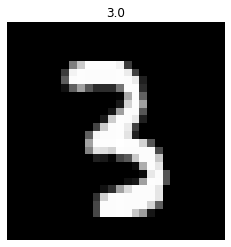

In [11]:
# Visualising some images
def drawImg(X, Y, i):
    plt.imshow(X[i].reshape((28,28)), cmap = 'gray')
    plt.title(Y[i])
    plt.axis("off")
    plt.show()

drawImg(X, Y, 5)

### Step 2. Applying KNN

In [12]:
def dist(x1, x2):
    return np.sqrt(sum((x1 - x2)**2))
    
def knn(X, Y, query, k = 5):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(query, X[i])
        vals.append([d, Y[i]])
        
    vals.sort()
    vals = np.array(vals[:k])   # K-nearest points
    
    new_vals = np.unique(vals[:,1], return_counts = True)
    index = new_vals[1].argmax()
    pred = int(new_vals[0][index])
    
    return pred

### Step 3. Making Predictions

In [13]:
pred = knn(X_train, Y_train, X_test[4])
print(pred)

0


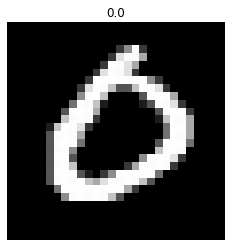

In [14]:
drawImg(X_test, Y_test, 4)

In [15]:
pred = knn(X_train, Y_train, X_test[24])
print(pred)

5


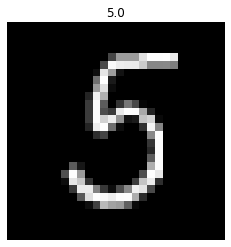

In [16]:
drawImg(X_test, Y_test, 24)

### Step 4. Predicting Accuracy of KNN over the test set

In [17]:
n = X_test.shape[0]
out = 0
for i in range(n):
    pred = knn(X_train, Y_train, X_test[i])
    if pred == int(Y_test[i]):
        out += 1

In [18]:
accuracy = (out/n)*100
print(accuracy)

90.2439024390244
